# Modules

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import wrapcauchy
from scipy.stats import levy_stable
#from plotly
import plotly.graph_objects as go

## Classes

In [23]:
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Brownian Motion 1-D

Using Winer process

In [3]:
#Init parameters
s_pos = 0
n_steps = 10000

#Init Brownian walker Vector with numpy
bw = np.ones(n_steps)*s_pos

In [7]:
#np.ones(shape=(10,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [8]:
#Generate the trajectory
for i in range(1,n_steps):
    di = np.random.choice([1,-1])
    #Winer process
    bw[i] = bw[i-1]+(di/np.sqrt(n_steps))

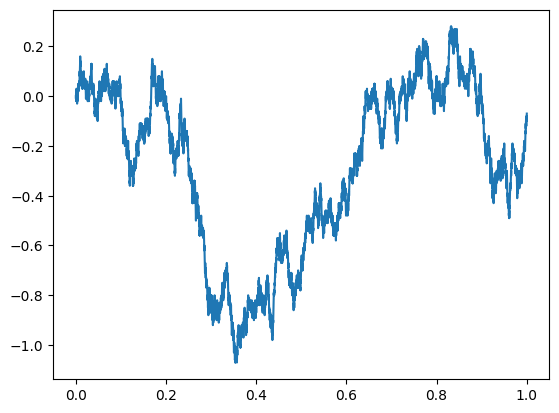

In [10]:
#Define axuliar vector for time
times = np.linspace(0,1,n_steps)
plt.plot(times, bw)
plt.show()


## Alternative implememntation for Brownian Motion
Easier to make it N-dimensional or N-trajectories

In [19]:
#Init parameters
n_steps = 10000
d = 10
if n_steps < 30:
    print("Warning, number of steps is too small")
#Displacements
dB = np.random.choice([1,-1], size=(n_steps-1,d))*1/np.sqrt(n_steps)
#Init Brownian Walk
bw = np.zeros(shape = (1,d))
#Generate the trajectory
bw = np.concatenate((bw, np.cumsum(dB, axis=0)), axis=0)

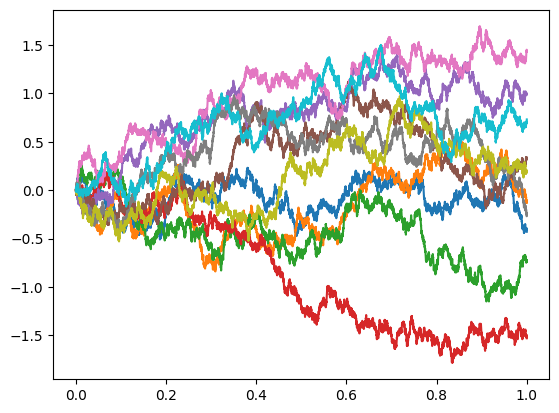

In [20]:
#Define axuliar vector for time
times = np.linspace(0,1,n_steps)
plt.plot(times, bw)
plt.show()

## Implementation a Brownian Motion in 2D using vectors

In [45]:
# Init parameters
n_steps = 100
s_pos = 0
speed = 6
#Init velocity vector
velocity = Vec2d(speed,0)
#Matrix for the BRownian Walker
BM_2d = np.ones(shape=(n_steps,2))*s_pos
for i in range(1,n_steps):
    turn_angle = np.random.choice([0, np.pi/2, np.pi, 3*np.pi/2])
    #We are rotating the velocity vector
    velocity = velocity.rotated(turn_angle)
    #Update to new position
    BM_2d[i,0] = BM_2d[i-1,0] + velocity.x
    BM_2d[i,1] = BM_2d[i-1,1] + velocity.y


## Plot in 2D

<function matplotlib.pyplot.show(close=None, block=None)>

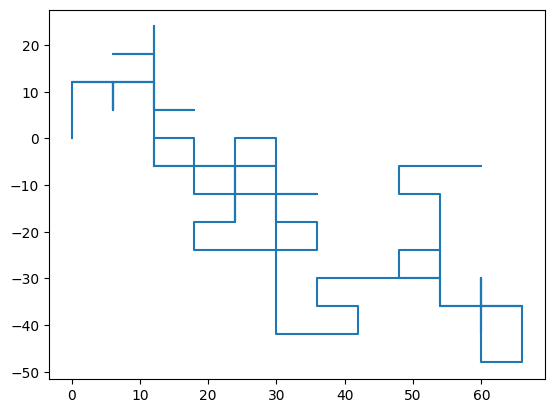

In [46]:
#Using is matplotlib
plt.plot(BM_2d[:,0], BM_2d[:,1])
plt.show

## Plot in 3D

<function matplotlib.pyplot.show(close=None, block=None)>

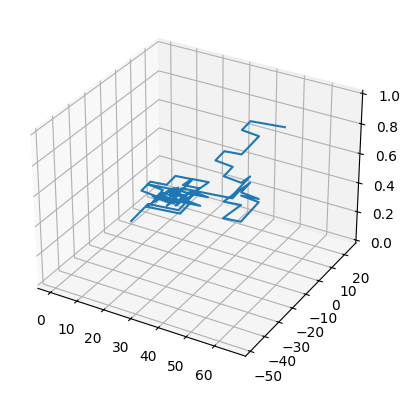

In [47]:
#time auxiliar
times = np.linspace(0, 1, n_steps)
plt.axes(projection = '3d')
plt.plot(BM_2d[:,0], BM_2d[:,1], times)
plt.show